In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
# Mass distributions
def mean(DL, dMdDL = 30./1000., offset = 5.):
    return DL*dMdDL + offset

def std(DL, dMdDL = 8./1000., offset = 1.):
    return DL*dMdDL + offset

def PLpeak(m, alpha = -2., mmin = 5., mmax = 70., mu = 30., sigma = 4., w = 0.2):
    norm_pl = (1-alpha)/(mmin**(alpha+1) - mmax**(alpha+1))
    pl      = norm_pl * m**alpha
    peak    = np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    return w*pl + (1-w)*peak

def evolving_gaussian(m, DL):
    mu = mean(DL)
    sigma = std(DL)
    return np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

# DL distributions
def DLsq(DL, DLmax = 5000):
    return 3*DL**2/DLmax**3

def gaussian(DL, mu = 1600, sigma = 400):
    return np.exp(-0.5*((DL-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

In [5]:
m = np.linspace(10,200,1000).reshape(-1,1)
dL = np.linspace(10,5000,100)

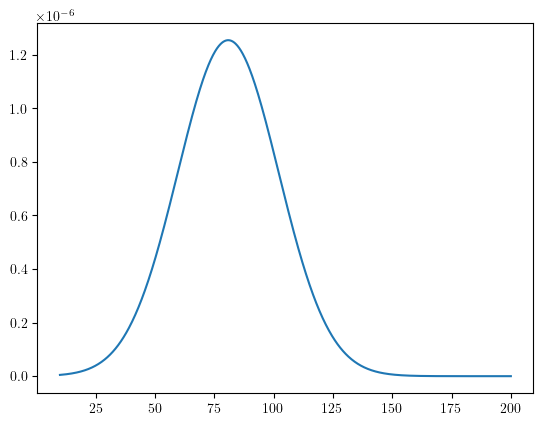

In [16]:
# plt.plot(m, np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,0])
# plt.plot(m, np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,25])
plt.plot(m, np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,50])
# plt.plot(m, np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,75])
# plt.plot(m, np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,99])

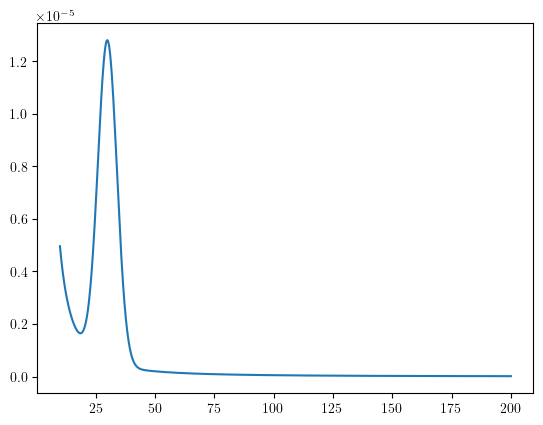

In [17]:
# plt.plot(m, np.einsum("ij, j -> ij", PLpeak(m), DLsq(dL))[:,0])
# plt.plot(m, np.einsum("ij, j -> ij", PLpeak(m), DLsq(dL))[:,25])
plt.plot(m, np.einsum("ij, j -> ij", PLpeak(m), DLsq(dL))[:,50])
# plt.plot(m, np.einsum("ij, j -> ij", PLpeak(m), DLsq(dL))[:,75])
# plt.plot(m, np.einsum("ij, j -> ij", PLpeak(m), DLsq(dL))[:,99])